## Report 4: Candidate moves

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245

Source code: https://github.com/Oskshust/evo_comp/tree/main/4

#### PROBLEM DESCRIPTION:

In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The aim of the problem is to compare the paths created by the steepest method taken from the previous assignment (baseline) and candidate move heuristic.

In [1]:
from scripts import *

np.random.seed(123)

a = "../data/TSPA.csv"
b = "../data/TSPB.csv"
c = "../data/TSPC.csv"
d = "../data/TSPD.csv"

Time per iteration: 103.37629175186157 s
Results: 77869.5(75645 - 80094)
Best solution: [0, 1, 4, 6, 8, 11, 12, 14, 19, 20, 21, 22, 24, 26, 27, 31, 36, 37, 41, 43, 45, 48, 50, 51, 53, 55, 59, 60, 62, 64, 66, 69, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 91, 92, 94, 95, 96, 98, 101, 106, 108, 109, 111, 112, 113, 114, 116, 117, 119, 121, 123, 124, 127, 128, 130, 132, 134, 135, 141, 143, 144, 147, 149, 152, 153, 154, 156, 159, 160, 161, 163, 164, 167, 169, 170, 172, 174, 175, 177, 178, 185, 186, 189, 190, 192, 194, 195, 199]


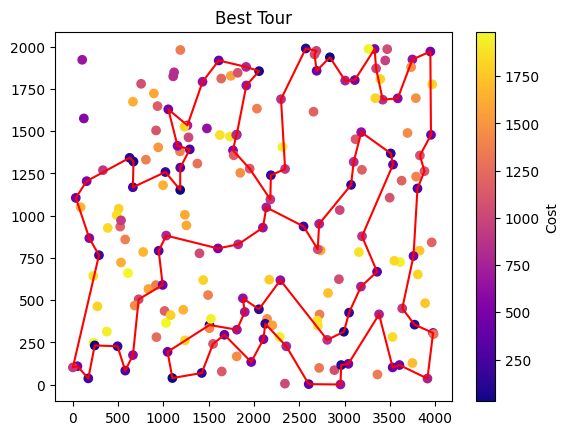

In [2]:
run_baseline(a, 2)

## LS with candidate moves

### Pseudocode:

Operations we use:

```
def exchange_edges(solution, matrix, move_start, move_end):
    if move_start > move_end:
        neighbor = np.concatenate((solution[move_start:][::-1], solution[move_end+1:move_start], solution[:move_end+1][::-1]))
    else:
        neighbor = np.concatenate((solution[:move_start], solution[move_start:move_end+1][::-1], solution[move_end+1:]))
    
    delta = calculate_delta_edge(solution, matrix, move_start, move_end)

    return neighbor, delta


def insert_node(solution, matrix, new_node, insert_id, node_swap=True):
    neighbor = solution.copy()

    if node_swap:
        neighbor[insert_id] = new_node
    else:
        neighbor[insert_id] = neighbor[insert_id + 1]
        neighbor[insert_id + 1] = new_node

    delta = calculate_delta_node(solution, matrix, new_node, insert_id, node_swap)

    return neighbor, delta
```

Neighbourhood:

```
def get_neighborhood(solution, matrix, candidates):
    neighbors = []

    for n1_i, n1 in enumerate(solution):
        node_candidates = candidates[n1]
        next_i = (n1_i + 1) % len(solution)
        prev_i = n1_i - 1
        
        for n2 in node_candidates:
            where_n2 = np.where(solution == n2)[0]
            n2_in_solution = len(where_n2) != 0

            if n2_in_solution:
                n2_i = where_n2[0]

                neighbors.append(exchange_edges(solution, matrix, next_i, n2_i))
                neighbors.append(exchange_edges(solution, matrix, n1_i, n2_i - 1))
            else:
                neighbors.append(insert_node(solution, matrix, n2, next_i))
                neighbors.append(insert_node(solution, matrix, n2, prev_i, node_swap=False))
    
    return neighbors
```

Algorithm:

```
def steepest(matrix, starting_sol, candidates):
    best_sol = np.array(starting_sol)
    best_delta = 0
    neighbourhood = get_neighbourhood(best_sol, matrix, candidates)

    while len(neighbourhood):
        deltas = np.array([delta for _, delta in neighbourhood])
        best_index = np.argmin(deltas)
        probably_best_sol, best_delta = neighbourhood[best_index]

        if best_delta >= 0:
            break

        best_sol, best_delta = neighbourhood[best_index]
        neighbourhood = get_neighbourhood(best_sol, matrix, candidates)

    return best_sol, calculate_cost(best_sol, matrix)
```

Time per iteration: 5.110870718955994 s
Results: 80383.5(80264 - 80503)
Best solution: [0, 1, 4, 6, 8, 11, 19, 20, 21, 22, 23, 26, 28, 31, 32, 36, 37, 40, 41, 43, 48, 50, 51, 53, 55, 59, 60, 61, 62, 64, 65, 66, 71, 72, 74, 75, 76, 77, 79, 80, 81, 87, 88, 91, 93, 94, 95, 96, 98, 101, 106, 108, 109, 111, 112, 113, 114, 117, 119, 121, 127, 128, 132, 133, 135, 137, 141, 143, 144, 145, 147, 149, 150, 151, 152, 153, 154, 156, 159, 160, 161, 163, 164, 167, 169, 170, 171, 175, 177, 178, 180, 183, 185, 186, 189, 190, 192, 194, 195, 199]


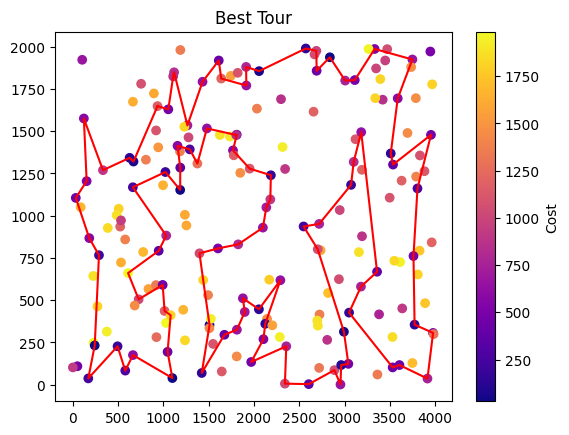

In [2]:
run_experiment(a, 2, 10)

In [ ]:
run_experiment(b, 2, 10)

In [ ]:
run_experiment(c, 2, 10)

In [ ]:
run_experiment(d, 2, 10)

### Objective function values:

| Algorithm | Instance A  | Instance B   | Instance C   | Instance D   |
|-----------|----------|----------|----------|----------|
| RANDOM | 264750.185 (241153 - 298242) | 266304.945 (240380 - 296499) | 214950.675 (188548 - 239747) | 218555.1 (194917 - 246170) |
| NEAREST_N  | 87679.135 (84471 - 95013) | 79282.58 (77448 - 82631) | 58872.68 (56304 - 63697) | 54290.68 (50335 - 59846) |
| G_CYCLE  | 78871.415 (76270 - 84172) | 75752.16 (71970 - 80491)  | 56731.47 (53614 - 60247) | 54900.765 (50639 - 60031) |
| 2-regret  | 115926.5 (115650 - 116203) | 115489.285 (101374 - 126143) | 69722.2 (64432 - 73978) | 68686.81 (60313 - 74039) |
| weighted 2-regret  | 76445.205 (74563 - 79037) | 71828.865 (69453 - 77709) | 55889.185 (53029 - 60243) | 53715.845 (49165 - 59081) |
|-----------|----------|----------|----------|----------|
| steepestLS_2e_r (baseline) | 77901(75066 - 81579) | 71252(68289 - 76800) | 51491(49378 - 54499) | 48282(45271 - 51721) |
|-----------|----------|----------|----------|----------|
| LS_candidate_moves | avg (min - max) | avg (min - max) | avg (min - max) | avg (min - max) |

## Conclusions:

Candidate moves seem to have similar performance to LS (however - worse then steepest LS), but offers much better time complexity